# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

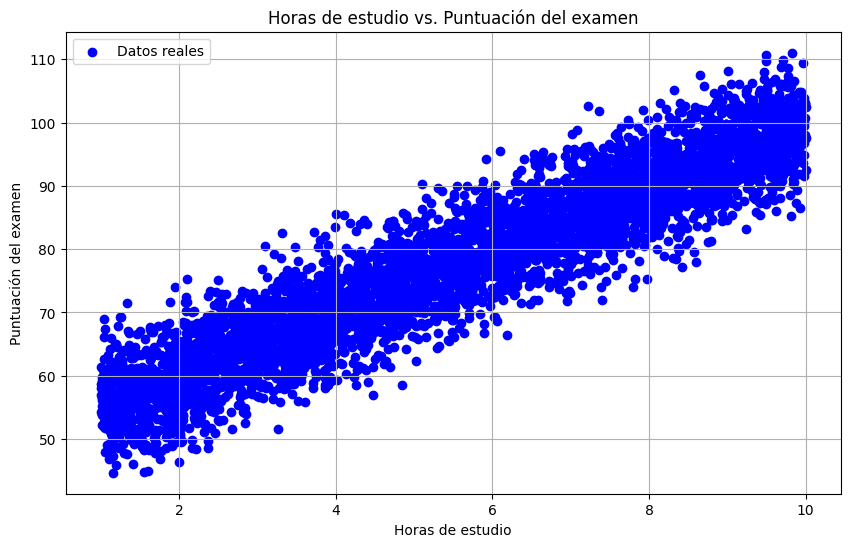

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# A COMPLETAR

X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.2,random_state=11)

X_train, X_val, y_train, y_val= train_test_split(X_trainval,y_trainval,test_size=0.2,random_state=11)

print('Datos de Entrenamiento:', X_train.shape)
print('Datos de Validación:', X_val.shape)
print('Datos de Test:', X_test.shape)


Datos de Entrenamiento: (3200,)
Datos de Validación: (800,)
Datos de Test: (1000,)


## Implementación manual de la regresión con gradiente descendente


Ahora necestiaría que me explicases esto: Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos

In [5]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    # A COMPLETAR
    diferencia=y_true-y_pred
    cost=np.mean(diferencia ** 2)
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    train_loss_per_epoch=[]
    val_loss_per_epoch=[]
    w_gradients = []
    b_gradients = []
    # A COMPLETAR

    # 1. Inicializar los coeficientes (pesos) w y b
    w=np.random.rand()
    b=np.random.rand()
    # 2. bucle que itere por epoch

    for _ in range(epochs):
        
        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred = (X_train* w) + b
        
        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_pred)
        train_loss_per_epoch.append(train_loss)
        
        # 5. Calcular los gradientes para los pesos w y b
        # gradiente de b es la derivada de la función de coste con respecto a b: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]
        # gradiente de w es la derivada de la función de coste con respecto a w: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]
        
        w_derivative = (-2 / X_train.shape[0]) * np.sum((y_train-y_pred) * X_train)
        b_derivative = (-2 / X_train.shape[0]) * np.sum(y_train-y_pred)
        # Almacena los gradientes
        w_gradients.append(w_derivative)
        b_gradients.append(b_derivative)

        # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
        w -= lr * w_derivative
        b -= lr * b_derivative

        # 7. Calcular y_pred del conjunto de validación por epoch
        y_pred_val =(X_val* w) + b
        
        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch,w_gradients, b_gradients

In [6]:
X_train

array([2.64656746, 1.61070236, 3.75939461, ..., 6.89744123, 3.49865836,
       6.49632412])

In [8]:
# Hiperparámetros
lr= 0.01
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch,w_gradients, b_gradients = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

In [9]:
print("Pérdidas de entrenamiento:", train_loss_per_epoch)
print("Pérdidas de validación:", val_loss_per_epoch)
print("Len de entrenamiento:", len(train_loss_per_epoch))
print("Len de validación:", len(val_loss_per_epoch))

Pérdidas de entrenamiento: [6053.641832509378, 773.5741223417176, 448.8917284172606, 426.39512229619197, 422.344251358264, 419.4372535232527, 416.6189704007899, 413.8249259912003, 411.05105447505906, 408.296974644516, 405.56253091993204, 402.8475824233621, 400.15199011008286, 397.475615977228, 394.8183230089023, 392.1799751662511, 389.5604373803173, 386.9595755451171, 384.3772565107728, 381.8133480766964, 379.2677189848219, 376.7402389128858, 374.2307784677543, 371.73920917880025, 369.2654034913258, 366.80923476003153, 364.3705772425346, 361.94930609292925, 359.5452973553975, 357.15842795786136, 354.788575705684, 352.43561927541276, 350.0994382085685, 347.7799129054789, 345.47692461915557, 343.19035544921456, 340.92008833584083, 338.66600705379557, 336.4279962064655, 334.20594121995555, 331.99972833722387, 329.80924461225675, 327.63437790428776, 325.47501687205596, 323.3310509681061, 321.20237043312915, 319.08886629034333, 316.99043033991484, 314.9069551534187, 312.8383340683397, 310.7

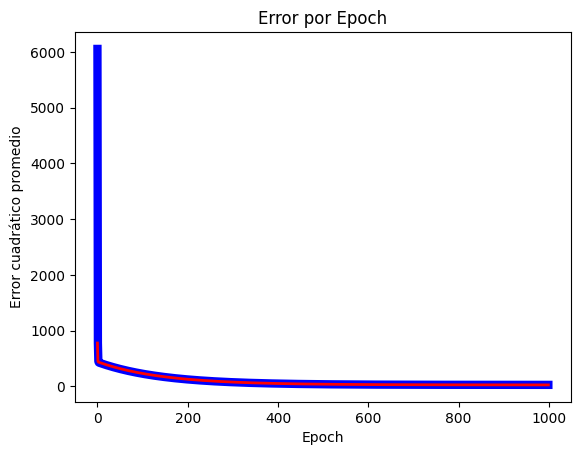

In [10]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b',linewidth=6)
plt.plot(range(epochs), val_loss_per_epoch, '-r',linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

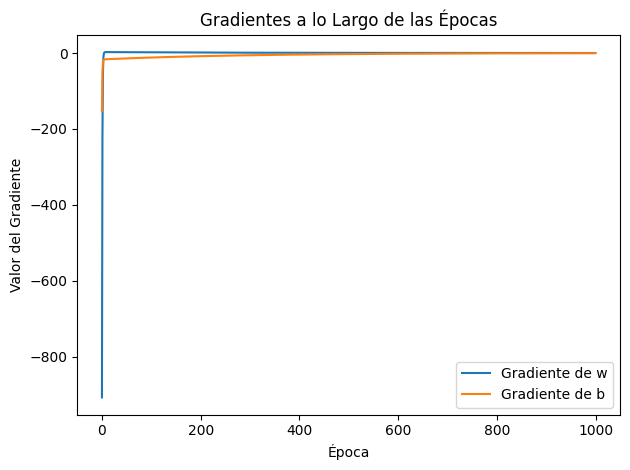

In [12]:
# Grafica de los gradientes , 

plt.plot(w_gradients, label='Gradiente de w')
plt.plot(b_gradients, label='Gradiente de b')
plt.title('Gradientes a lo Largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Valor del Gradiente')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Realizar predicciones en test
y_pred =(X_test* w) + b

# Calcular el costo
cost = cost_function(y_pred,y_test)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
from sklearn.metrics import r2_score

mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

## Implementación de la regresión lineal usando sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión lineal con sklearn
modelo=LinearRegression()


# Entrenar el modelo con los datos de entrenamiento
X_train = X_train.reshape(-1, 1)
modelo.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en test
X_test=X_test.reshape(-1,1)
y_pred = modelo.predict(X_test)

# Calcular el costo
cost = cost_function(y_test,y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

## Comparación de parámetros obtenidos

In [ ]:
b_sklearn = modelo.intercept_
w_sklearn = modelo.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)